In [10]:
import osmnx as ox
import math
import heapq
from classes.RouteAlgo import RouteAlgo
from classes.Helpers import Helpers

## OSMNX for getting road network
Allows for us to get coordinates and network of any location specified to use for pathfinding algorithms.

In [ ]:
# Get the graph for the area 
#G = ox.graph_from_place("Manhattan, New York, USA", network_type="drive")
#Save the graph to a file
#ox.save_graphml(G, filepath="manhattan.graphml")

## Get Loaded Graph

In [11]:
G = ox.load_graphml("./data/manhattan_drive.graphml")


## Convert graph to adjacency list

In [12]:
def PrintPath(start, goal, graph, G, route_algo, metric):

    def format_time(seconds):
        # Convert seconds to hours, minutes, and seconds
        hours = int(seconds // 3600)
        minutes = int((seconds % 3600) // 60)
        secs = seconds % 60
        return f"{hours}h {minutes}m {secs:.2f}s"

    def format_distance(meters):
        # Convert meters to miles
        miles = meters / 1609.34
        return f"{miles:.2f} miles"

    print(f"\nEvaluating paths using {metric} as the cost function:\n")

    # Run A* algorithm
    astar_path, astar_cost = route_algo.a_star(start, goal, metric)
    if astar_path:
        if metric == 'length':
            print(f"A* Path {metric}: {format_distance(astar_cost)}")
        elif metric == 'travel_time_seconds':
            print(f"A* Path {metric}: {format_time(astar_cost)}")
        ox.plot_graph_route(G, astar_path, route_linewidth=2, node_size=0)

    # Run Dijkstra algorithm
    dijkstra_path, dijkstra_cost = route_algo.dijkstra(start, goal, metric)
    if dijkstra_path:
        if metric == 'length':
            print(f"Dijkstra Path {metric}: {format_distance(dijkstra_cost)}")
        elif metric == 'travel_time_seconds':
            print(f"Dijkstra Path {metric}: {format_time(dijkstra_cost)}")
        ox.plot_graph_route(G, dijkstra_path, route_linewidth=2, node_size=0)

    # Run DFS algorithm
    dfs_path, dfs_cost = route_algo.dfs(start, goal, metric)
    if dfs_path:
        if metric == 'length':
            print(f"DFS Path {metric}: {format_distance(dfs_cost)}")
        elif metric == 'travel_time_seconds':
            print(f"DFS Path {metric}: {format_time(dfs_cost)}")
        ox.plot_graph_route(G, dfs_path, route_linewidth=2, node_size=0)

    # Run BFS algorithm
    bfs_path, bfs_cost = route_algo.bfs(start, goal, metric)
    if bfs_path:
        if metric == 'length':
            print(f"BFS Path {metric}: {format_distance(bfs_cost)}")
        elif metric == 'travel_time_seconds':
            print(f"BFS Path {metric}: {format_time(bfs_cost)}")
        ox.plot_graph_route(G, bfs_path, route_linewidth=2, node_size=0)


In [16]:
graph = Helpers.CreateAdjList(G)


In [6]:
route_algo = RouteAlgo(graph, G)


In [7]:
# Define start and end locations
    # We could get user input to make it seem more interative.....
start_location = "Empire State Building, New York, NY"
end_location = "Times Square, New York, NY"


# Get coordinates for each location
start_coords = Helpers.GetCoords(start_location)
end_coords = Helpers.GetCoords(end_location)


# Define start and goal nodes
start = ox.distance.nearest_nodes(G, X=start_coords[1], Y=start_coords[0])
goal = ox.distance.nearest_nodes(G, X=end_coords[1], Y=end_coords[0])  


Empire State Building Node: 42446701 to Times Square Node: 42439984
Start Node: 42446701 Goal Node: 42439984
Using length as the cost function

Evaluating paths using length as the cost function:

A* Path length: 1.01 miles


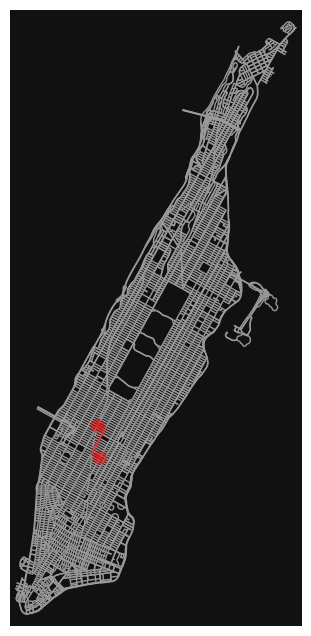

Dijkstra Path length: 1.01 miles


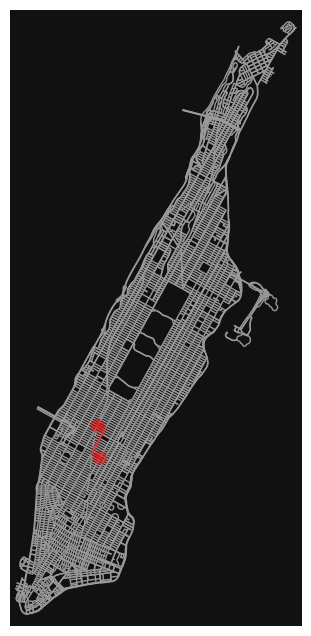

DFS Path length: 24.23 miles


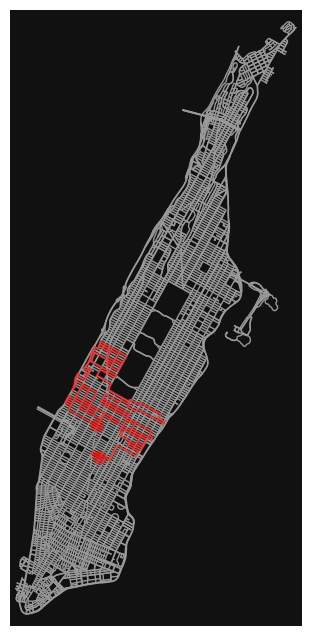

BFS Path length: 1.26 miles


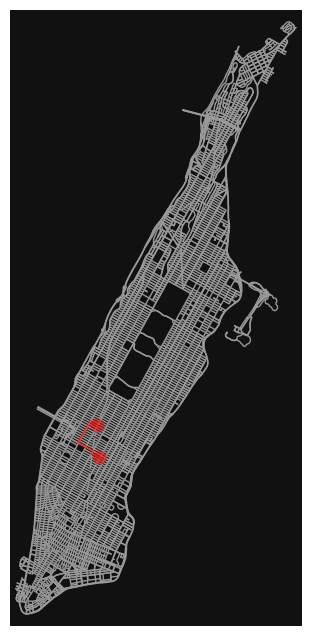

Using travel_time_seconds as the cost function

Evaluating paths using travel_time_seconds as the cost function:

A* Path travel_time_seconds: 0h 2m 25.84s


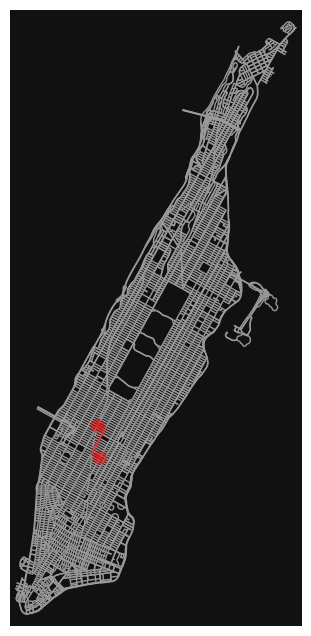

Dijkstra Path travel_time_seconds: 0h 2m 25.84s


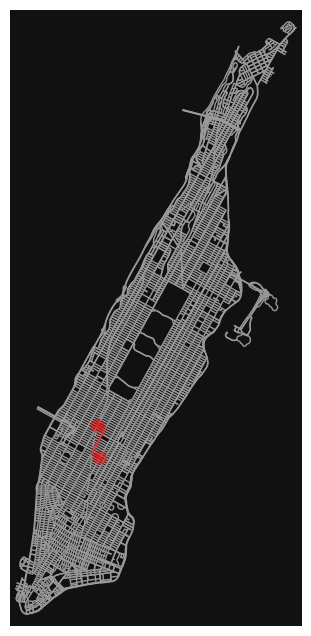

DFS Path travel_time_seconds: 0h 57m 58.28s


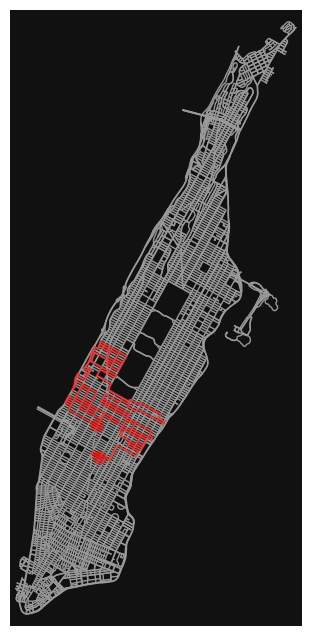

BFS Path travel_time_seconds: 0h 3m 0.88s


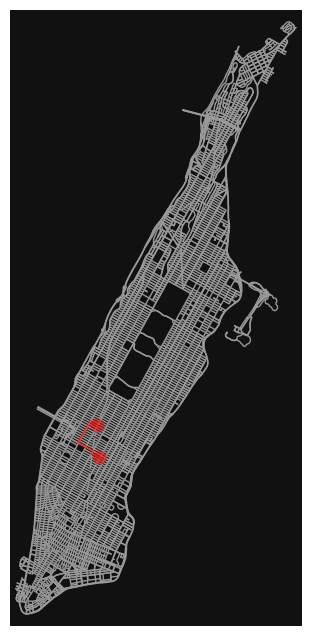

----------------------------------------


In [21]:
print("Empire State Building Node:", start, "to Times Square Node:", goal)

print("Start Node:", start, "Goal Node:", goal)

metrics = ['length', 'travel_time_seconds']
# Print the path
for metric in metrics:
    print(f"Using {metric} as the cost function", end="\n")
    PrintPath(start, goal, graph, G, route_algo, metric)
print("--"*20)
    

In [17]:
start_location = "Central Park, New York, NY"
end_location = "Battery Park, New York, NY"

start_coords = Helpers.GetCoords(start_location)

end_coords = Helpers.GetCoords(end_location)

start = ox.distance.nearest_nodes(G, X=start_coords[1], Y=start_coords[0])

goal = ox.distance.nearest_nodes(G, X=end_coords[1], Y=end_coords[0])

Central Park Node: 42433927 to Battery Park Node: 42444353
Start Node: 42433927 Goal Node: 42444353
Using length as the cost function

Evaluating paths using length as the cost function:

A* Path length: 6.26 miles


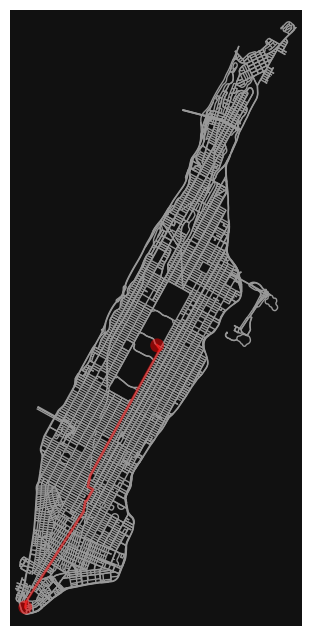

Dijkstra Path length: 6.26 miles


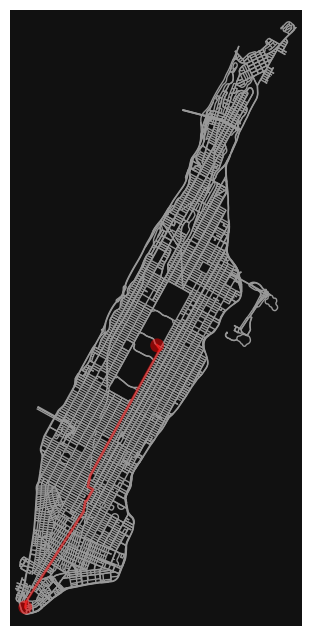

DFS Path length: 105.66 miles


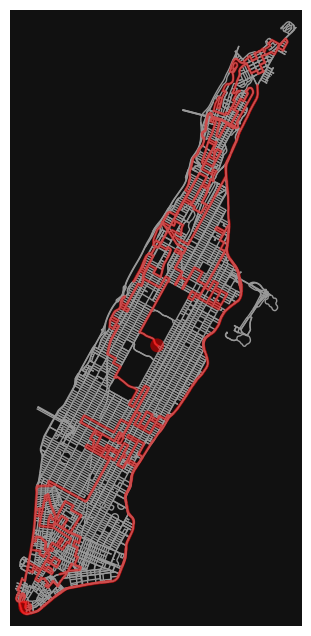

BFS Path length: 8.05 miles


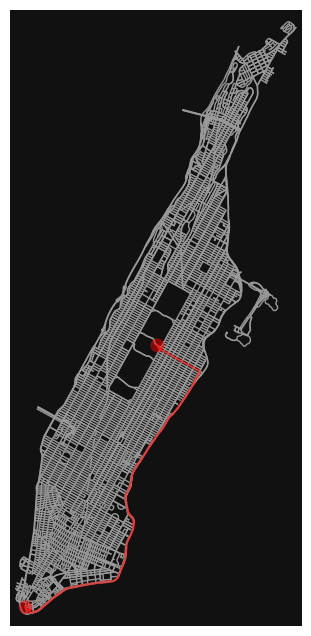

Using travel_time_seconds as the cost function

Evaluating paths using travel_time_seconds as the cost function:

A* Path travel_time_seconds: 0h 13m 55.57s


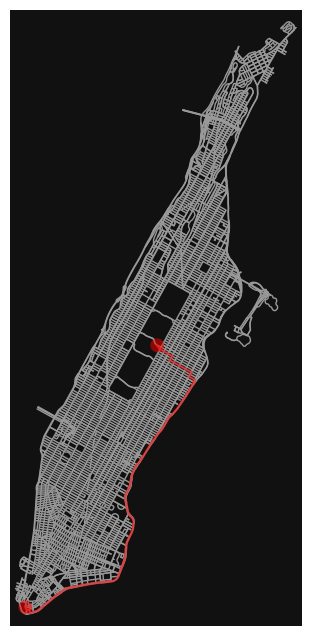

Dijkstra Path travel_time_seconds: 0h 13m 55.57s


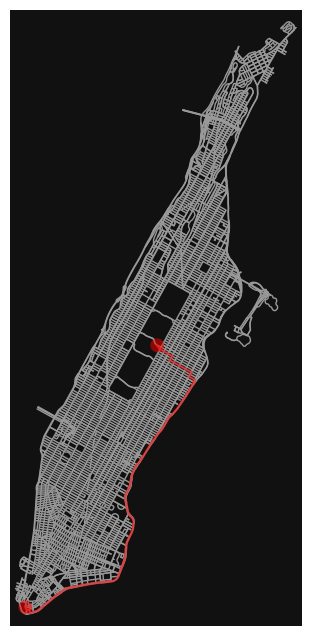

DFS Path travel_time_seconds: 3h 55m 40.12s


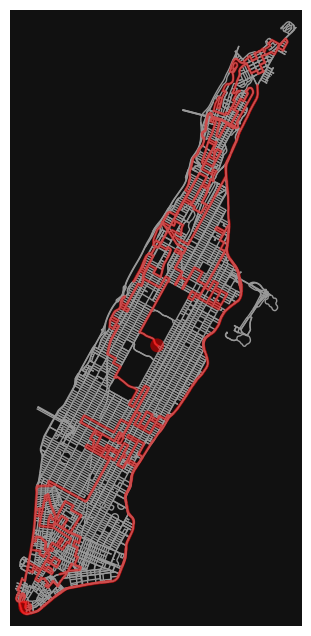

BFS Path travel_time_seconds: 0h 13m 55.72s


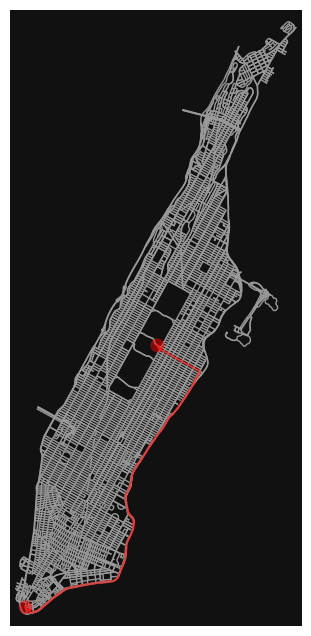

In [18]:

print("Central Park Node:", start, "to Battery Park Node:", goal)

print("Start Node:", start, "Goal Node:", goal)

for metric in metrics:
    print(f"Using {metric} as the cost function", end="\n")
    PrintPath(start, goal, graph, G, route_algo, metric)
    

In [8]:
import os
#convert notebook to html
os.system("jupyter nbconvert --to html RouteFinder.ipynb")


[NbConvertApp] Converting notebook RouteFinder.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 3200148 bytes to RouteFinder.html


0